<a href="https://colab.research.google.com/github/Sai-Vara-Prasad-Lekkalapudi/major-project/blob/main/Major_project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Major project

##Project Topic:
Financial Feature Optimization for Corporate Bankruptcy Prediction using Gradient Boosting Models.

##Dataset: https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data
##Research question:
Which financial indicators are most influential in predicting corporate bankruptcy, and how does feature selection affect model performance
##Goal:
My aim is to identify the most important financial features influencing bankruptcy prediction and to understand how feature selection and dimensionality reduction affect both accuracy and interpretability of machine learning models.


In [ ]:
# Step 1: Import libraries
import pandas as pd
from scipy.io import arff
import urllib.request

# Step 2: Download the ARFF file locally
url = 'https://raw.githubusercontent.com/Sai-Vara-Prasad-Lekkalapudi/major-project/refs/heads/main/1year.arff'
local_path = '/content/1year.arff'
urllib.request.urlretrieve(url, local_path)

# Step 3: Load the ARFF file
data, meta = arff.loadarff(local_path)

# Step 4: Convert to pandas DataFrame
df = pd.DataFrame(data)

# Step 5: Display the first few rows and info
print("First 5 rows of the data:")
print(df.head())

print("\nData info:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())


First 5 rows of the data:
      Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7    Attr8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

    Attr9   Attr10  ...    Attr56   Attr57   Attr58    Attr59  Attr60  Attr61  \
0  1.1389  0.50494  ...  0.121960  0.39718  0.87804  0.001924  8.4160  5.1372   
1  1.6996  0.49788  ...  0.121300  0.42002  0.85300  0.000000  4.1486  3.2732   
2  1.3090  0.30408  ...  0.241140  0.81774  0.76599  0.694840  4.9909  3.9510   
3  1.0571  0.57353  ...  0.054015  0.14207  0.94598  0.000000  4.5746  3.6147   
4  1.1559  0.38677  ...  0.134850  0.48431  0.86515  0.124440  6.3985  4.3158   

    Attr62  Attr63

The dataset contains financial information for 7027 Polish companies, each described by 64 numerical financial indicators (named Attr1 to Attr64) and one target label ("class") that shows bankruptcy status (0 = not bankrupt, 1 = bankrupt). The data includes some missing values for several features, a sign of real-world financial datasets. Each feature represents a different financial ratio or company metric.

In [ ]:
# Importing required libraries
import pandas as pd
from scipy.io import arff
import urllib.request

#  List all 5 years ARFF file URLs from github raw data
urls = [
    'https://raw.githubusercontent.com/Sai-Vara-Prasad-Lekkalapudi/major-project/refs/heads/main/1year.arff',
    'https://raw.githubusercontent.com/Sai-Vara-Prasad-Lekkalapudi/major-project/refs/heads/main/2year.arff',
    'https://raw.githubusercontent.com/Sai-Vara-Prasad-Lekkalapudi/major-project/refs/heads/main/3year.arff',
    'https://raw.githubusercontent.com/Sai-Vara-Prasad-Lekkalapudi/major-project/refs/heads/main/4year.arff',
    'https://raw.githubusercontent.com/Sai-Vara-Prasad-Lekkalapudi/major-project/refs/heads/main/5year.arff'
]

# Downloading and loading each file into a dictionary of DataFrames
dfs = {}
for url in urls:
    year = url.split('/')[-1].split('.')[0]
    local_path = f'/content/{year}.arff'
    urllib.request.urlretrieve(url, local_path)
    data, meta = arff.loadarff(local_path)
    dfs[year] = pd.DataFrame(data)
    print(f"\nLoaded {year}: shape = {dfs[year].shape}")
    print(dfs[year].info())




Loaded 1year: shape = (7027, 65)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   7024 non-null   float64
 1   Attr2   7024 non-null   float64
 2   Attr3   7024 non-null   float64
 3   Attr4   6997 non-null   float64
 4   Attr5   7019 non-null   float64
 5   Attr6   7024 non-null   float64
 6   Attr7   7024 non-null   float64
 7   Attr8   7002 non-null   float64
 8   Attr9   7026 non-null   float64
 9   Attr10  7024 non-null   float64
 10  Attr11  6988 non-null   float64
 11  Attr12  6997 non-null   float64
 12  Attr13  7027 non-null   float64
 13  Attr14  7024 non-null   float64
 14  Attr15  7025 non-null   float64
 15  Attr16  7002 non-null   float64
 16  Attr17  7002 non-null   float64
 17  Attr18  7024 non-null   float64
 18  Attr19  7027 non-null   float64
 19  Attr20  7027 non-null   float64
 20  Attr21  5405 non-null   float64
 21  Att

I have successfully loaded all five datasets (1-year to 5-year) from the Polish Companies Bankruptcy dataset. Each file represents a different forecasting horizon - predicting whether a company will go bankrupt within 1 to 5 years.

Each dataset contains 64 financial indicators and 1 target variable (class), showing if a firm is bankrupt (b) or non-bankrupt (n). The number of records varies slightly across years, but all share the same structure and features.

From my observation:

The schema of all files is consistent (Attr1 - Attr64 + class).

Some attributes have missing values (especially in Attr21, Attr37, Attr45, and Attr60).

There is a high class imbalance — only a small portion of companies are bankrupt.

This gives me a clear base to proceed with data preprocessing, feature selection, and model training for bankruptcy prediction.

# Data Understanding (Exploration) EDA

Dataset Shape: (7027, 65)
Number of Missing Values:
 5835


/tmp/ipython-input-2383063611.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='coolwarm')


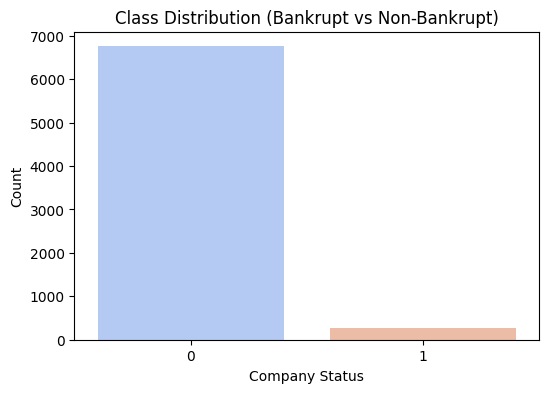

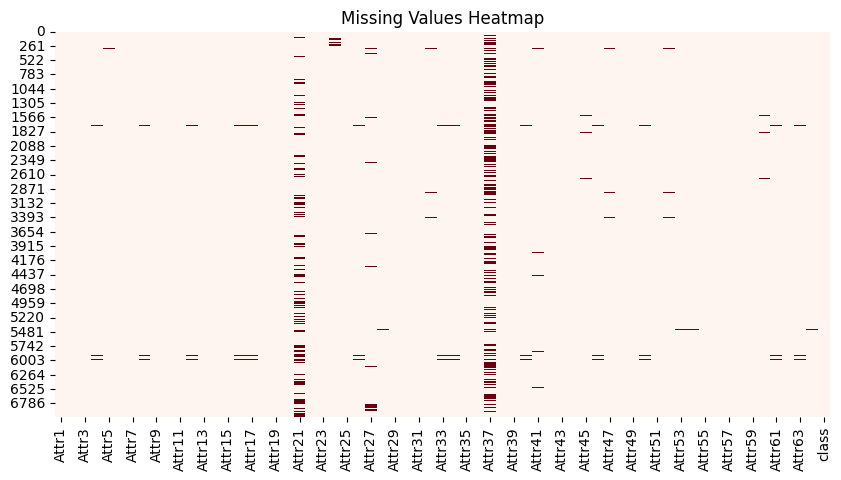

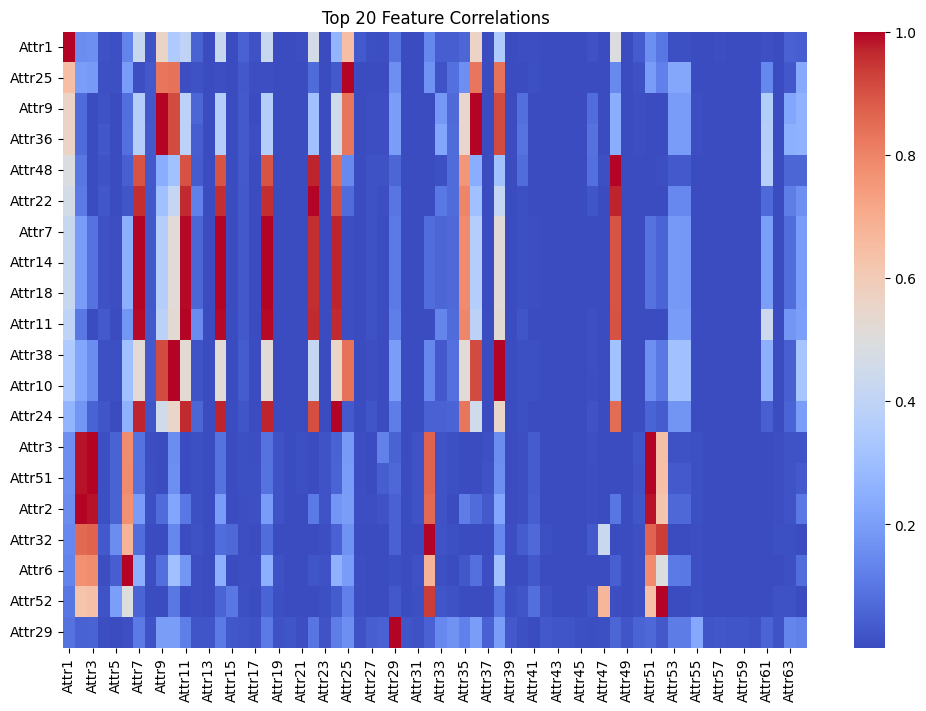

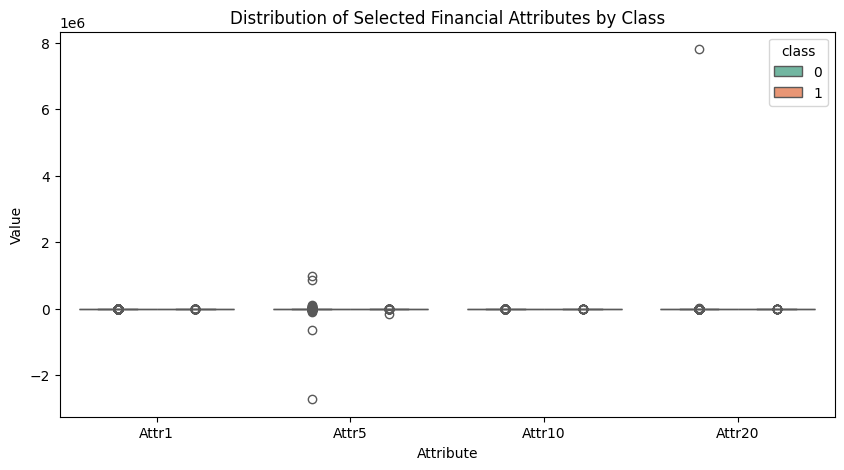

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1-year data to visualize
df = dfs['1year'].copy()

# Decode the 'class' column if needed
if isinstance(df['class'].iloc[0], bytes):
    df['class'] = df['class'].str.decode('utf-8')

# Basic Info
print("Dataset Shape:", df.shape)
print("Number of Missing Values:\n", df.isnull().sum().sum())

# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='coolwarm')
plt.title('Class Distribution (Bankrupt vs Non-Bankrupt)')
plt.xlabel('Company Status')
plt.ylabel('Count')
plt.show()

# Missing Values Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Values Heatmap')
plt.show()

# Correlation Heatmap (Top 20 features)
plt.figure(figsize=(12,8))
corr = df.drop('class', axis=1).corr()
sns.heatmap(corr.abs().nlargest(20, 'Attr1'), cmap='coolwarm', annot=False)
plt.title('Top 20 Feature Correlations')
plt.show()

# Boxplot Example: Distribution of a few financial ratios
plt.figure(figsize=(10,5))
sample_features = ['Attr1','Attr5','Attr10','Attr20']
df_melt = df.melt(id_vars='class', value_vars=sample_features, var_name='Attribute', value_name='Value')
sns.boxplot(x='Attribute', y='Value', hue='class', data=df_melt, palette='Set2')
plt.title('Distribution of Selected Financial Attributes by Class')
plt.show()


Dataset Shape: (10173, 65)
Number of Missing Values:
 12157


/tmp/ipython-input-3077632123.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='coolwarm')


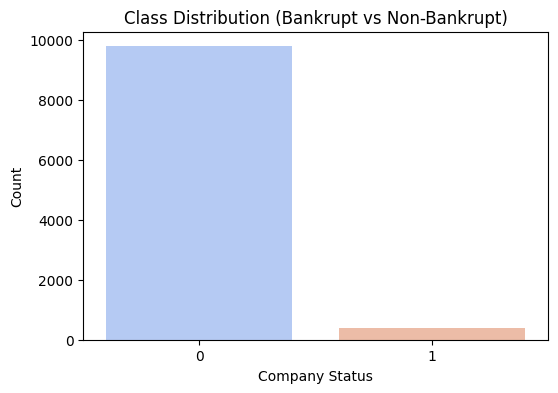

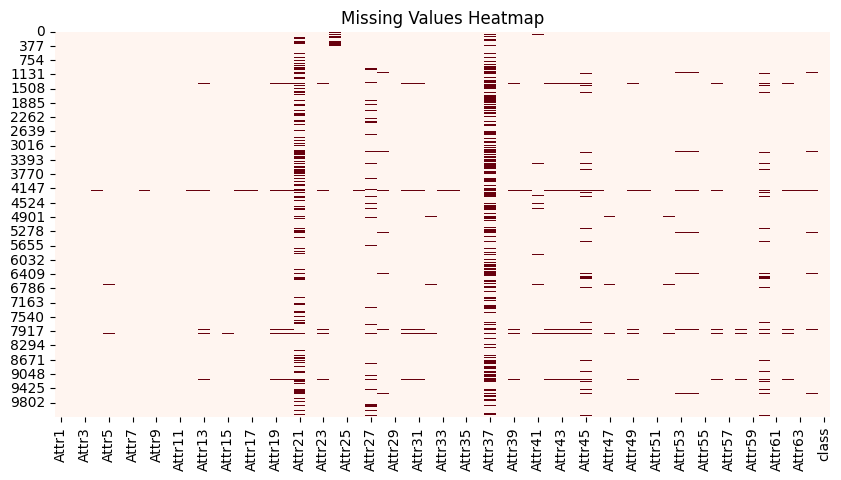

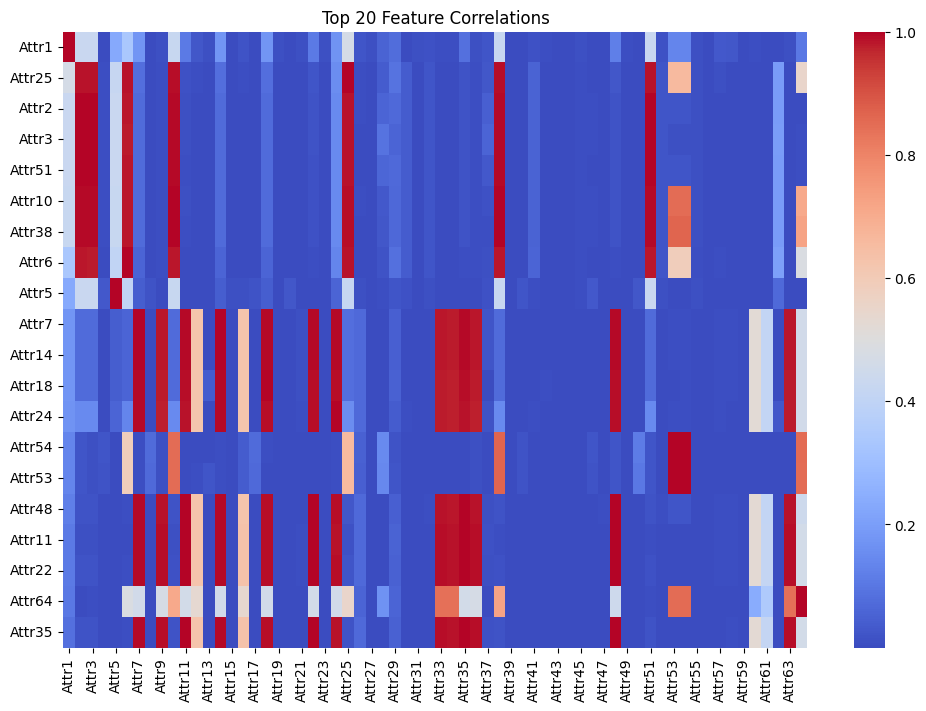

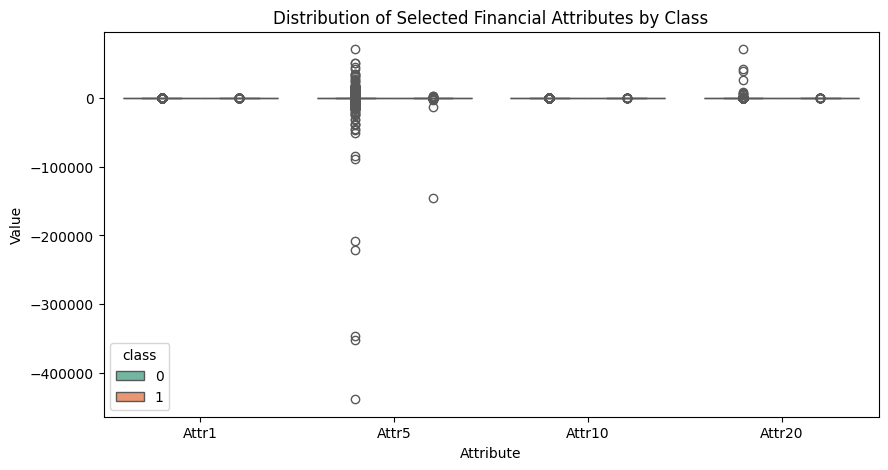

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1-year data to visualize
df = dfs['2year'].copy()

# Decode the 'class' column if needed
if isinstance(df['class'].iloc[0], bytes):
    df['class'] = df['class'].str.decode('utf-8')

# Basic Info
print("Dataset Shape:", df.shape)
print("Number of Missing Values:\n", df.isnull().sum().sum())

# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='coolwarm')
plt.title('Class Distribution (Bankrupt vs Non-Bankrupt)')
plt.xlabel('Company Status')
plt.ylabel('Count')
plt.show()

# Missing Values Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Values Heatmap')
plt.show()

# Correlation Heatmap (Top 20 features)
plt.figure(figsize=(12,8))
corr = df.drop('class', axis=1).corr()
sns.heatmap(corr.abs().nlargest(20, 'Attr1'), cmap='coolwarm', annot=False)
plt.title('Top 20 Feature Correlations')
plt.show()

# Boxplot Example: Distribution of a few financial ratios
plt.figure(figsize=(10,5))
sample_features = ['Attr1','Attr5','Attr10','Attr20']
df_melt = df.melt(id_vars='class', value_vars=sample_features, var_name='Attribute', value_name='Value')
sns.boxplot(x='Attribute', y='Value', hue='class', data=df_melt, palette='Set2')
plt.title('Distribution of Selected Financial Attributes by Class')
plt.show()


Dataset Shape: (10503, 65)
Number of Missing Values:
 9888


/tmp/ipython-input-345361539.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='coolwarm')


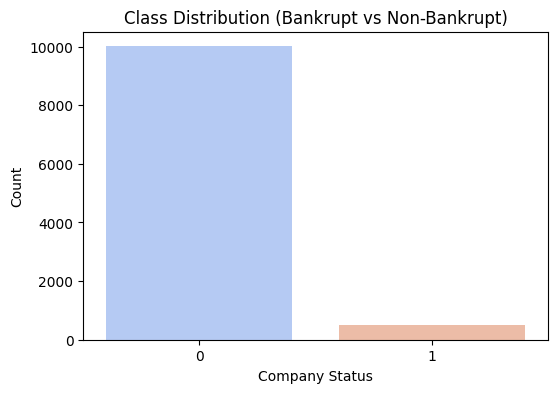

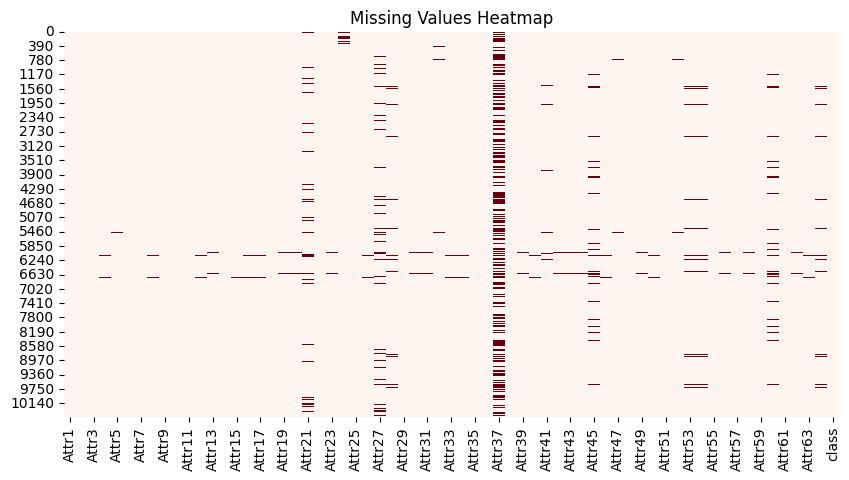

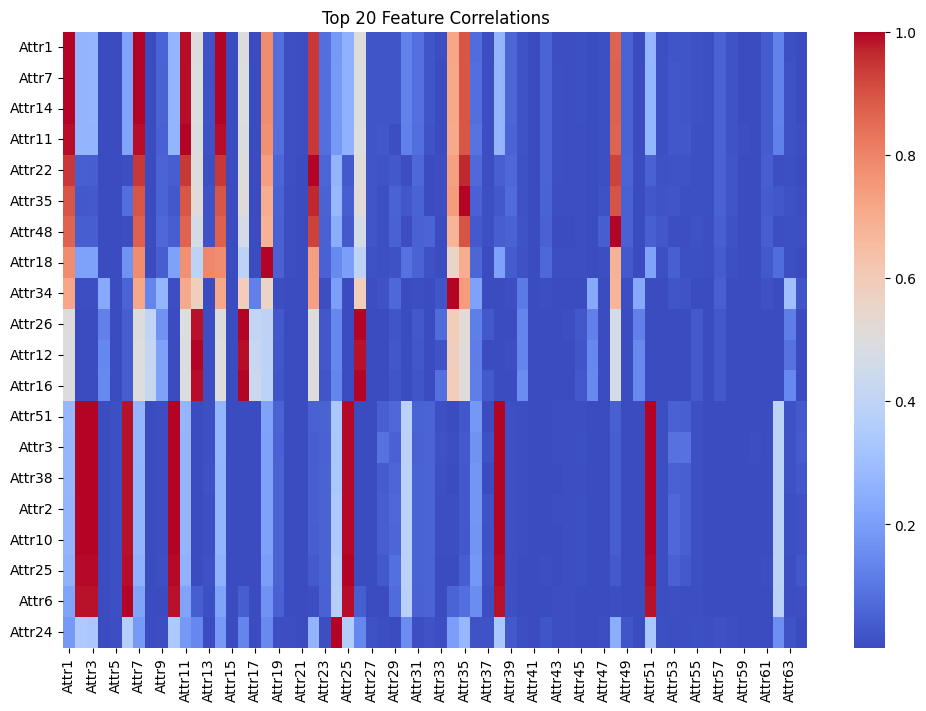

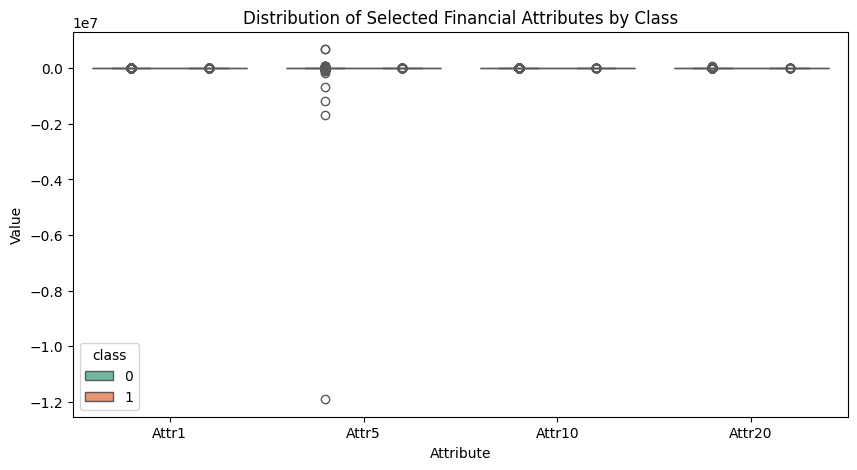

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1-year data to visualize
df = dfs['3year'].copy()

# Decode the 'class' column if needed
if isinstance(df['class'].iloc[0], bytes):
    df['class'] = df['class'].str.decode('utf-8')

# Basic Info
print("Dataset Shape:", df.shape)
print("Number of Missing Values:\n", df.isnull().sum().sum())

# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='coolwarm')
plt.title('Class Distribution (Bankrupt vs Non-Bankrupt)')
plt.xlabel('Company Status')
plt.ylabel('Count')
plt.show()

# Missing Values Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Values Heatmap')
plt.show()

# Correlation Heatmap (Top 20 features)
plt.figure(figsize=(12,8))
corr = df.drop('class', axis=1).corr()
sns.heatmap(corr.abs().nlargest(20, 'Attr1'), cmap='coolwarm', annot=False)
plt.title('Top 20 Feature Correlations')
plt.show()

# Boxplot Example: Distribution of a few financial ratios
plt.figure(figsize=(10,5))
sample_features = ['Attr1','Attr5','Attr10','Attr20']
df_melt = df.melt(id_vars='class', value_vars=sample_features, var_name='Attribute', value_name='Value')
sns.boxplot(x='Attribute', y='Value', hue='class', data=df_melt, palette='Set2')
plt.title('Distribution of Selected Financial Attributes by Class')
plt.show()


Dataset Shape: (9792, 65)
Number of Missing Values:
 8776


/tmp/ipython-input-2670435559.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='coolwarm')


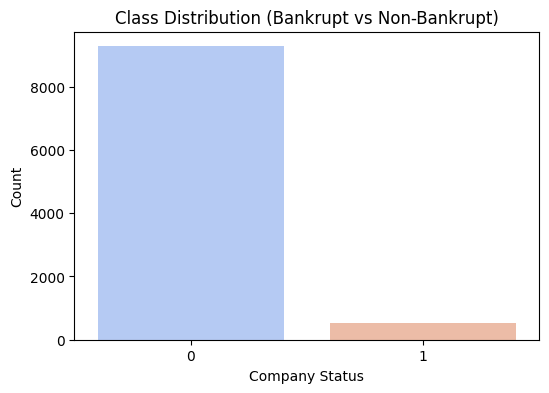

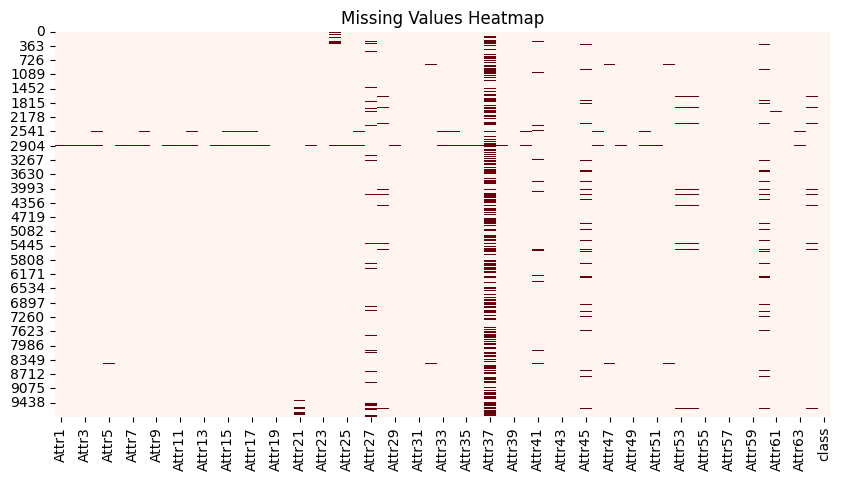

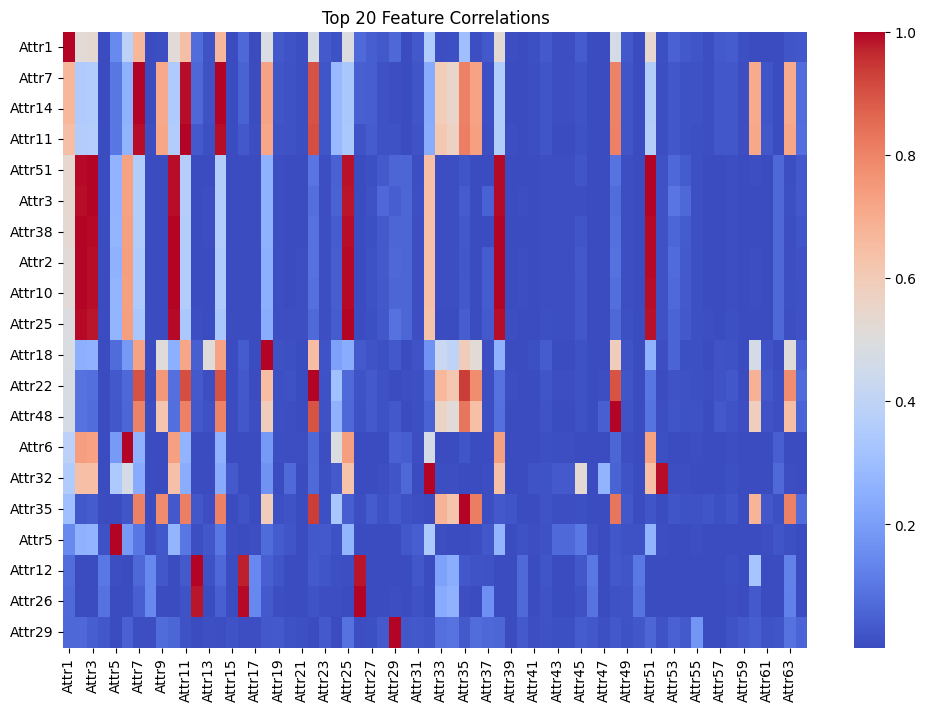

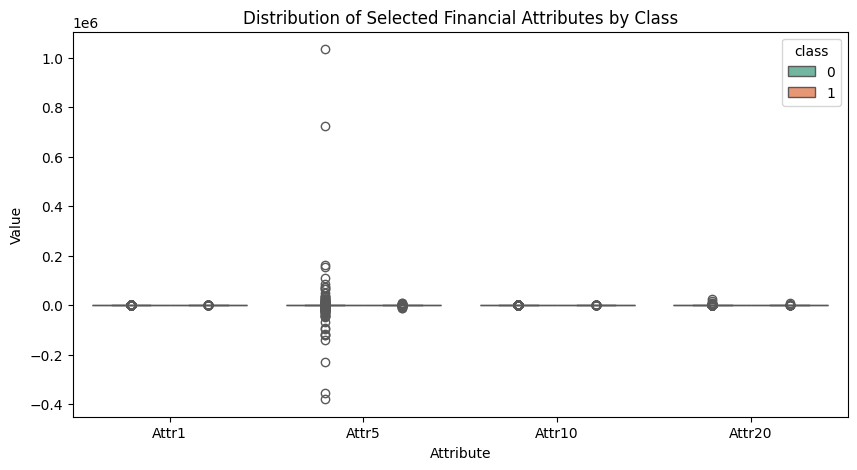

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1-year data to visualize
df = dfs['4year'].copy()

# Decode the 'class' column if needed
if isinstance(df['class'].iloc[0], bytes):
    df['class'] = df['class'].str.decode('utf-8')

# Basic Info
print("Dataset Shape:", df.shape)
print("Number of Missing Values:\n", df.isnull().sum().sum())

# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='coolwarm')
plt.title('Class Distribution (Bankrupt vs Non-Bankrupt)')
plt.xlabel('Company Status')
plt.ylabel('Count')
plt.show()

# Missing Values Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Values Heatmap')
plt.show()

# Correlation Heatmap (Top 20 features)
plt.figure(figsize=(12,8))
corr = df.drop('class', axis=1).corr()
sns.heatmap(corr.abs().nlargest(20, 'Attr1'), cmap='coolwarm', annot=False)
plt.title('Top 20 Feature Correlations')
plt.show()

# Boxplot Example: Distribution of a few financial ratios
plt.figure(figsize=(10,5))
sample_features = ['Attr1','Attr5','Attr10','Attr20']
df_melt = df.melt(id_vars='class', value_vars=sample_features, var_name='Attribute', value_name='Value')
sns.boxplot(x='Attribute', y='Value', hue='class', data=df_melt, palette='Set2')
plt.title('Distribution of Selected Financial Attributes by Class')
plt.show()


Dataset Shape: (5910, 65)
Number of Missing Values:
 4666


/tmp/ipython-input-186760866.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='coolwarm')


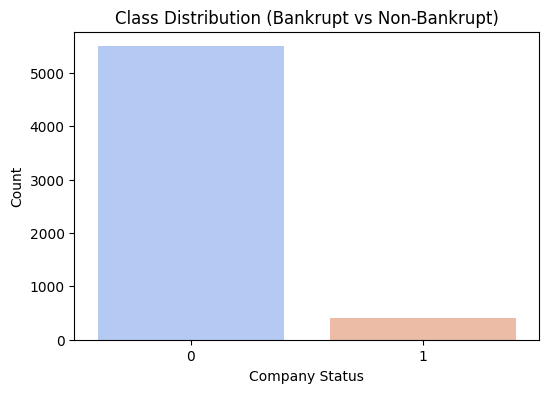

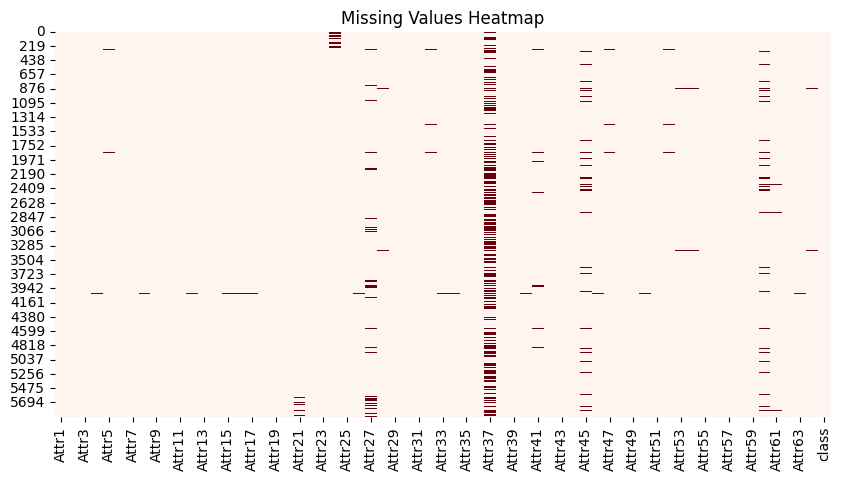

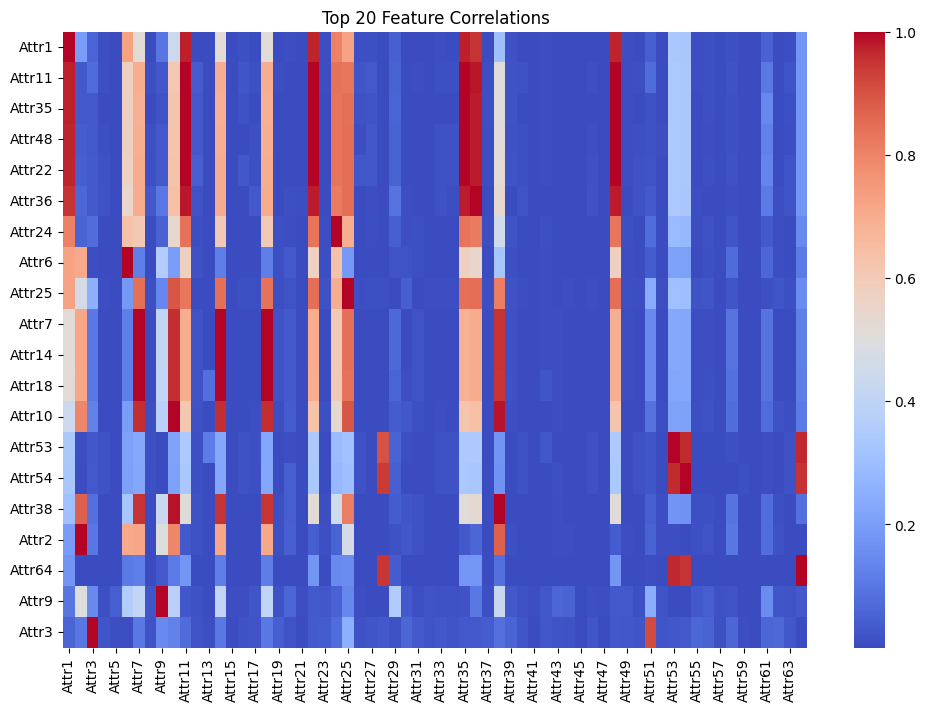

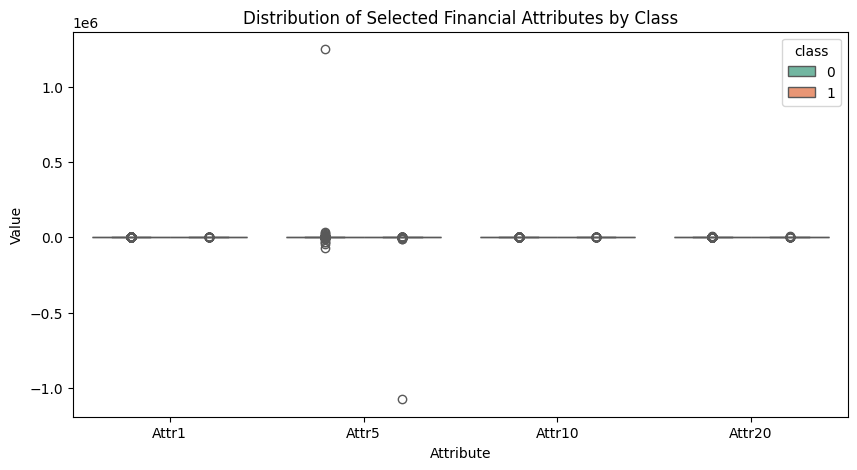

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1-year data to visualize
df = dfs['5year'].copy()

# Decode the 'class' column if needed
if isinstance(df['class'].iloc[0], bytes):
    df['class'] = df['class'].str.decode('utf-8')

# Basic Info
print("Dataset Shape:", df.shape)
print("Number of Missing Values:\n", df.isnull().sum().sum())

# Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='coolwarm')
plt.title('Class Distribution (Bankrupt vs Non-Bankrupt)')
plt.xlabel('Company Status')
plt.ylabel('Count')
plt.show()

# Missing Values Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title('Missing Values Heatmap')
plt.show()

# Correlation Heatmap (Top 20 features)
plt.figure(figsize=(12,8))
corr = df.drop('class', axis=1).corr()
sns.heatmap(corr.abs().nlargest(20, 'Attr1'), cmap='coolwarm', annot=False)
plt.title('Top 20 Feature Correlations')
plt.show()

# Boxplot Example: Distribution of a few financial ratios
plt.figure(figsize=(10,5))
sample_features = ['Attr1','Attr5','Attr10','Attr20']
df_melt = df.melt(id_vars='class', value_vars=sample_features, var_name='Attribute', value_name='Value')
sns.boxplot(x='Attribute', y='Value', hue='class', data=df_melt, palette='Set2')
plt.title('Distribution of Selected Financial Attributes by Class')
plt.show()


# Data Preparation (Preprocessing & Feature Engineering)

I observed that each feature in the Polish Bankruptcy dataset represents an important financial ratio (like debt ratio, liquidity, and profitability). Even if some values are missing, they still carry meaningful information about a company's financial condition.
So instead of dropping columns with missing data, I decided to impute the missing values using the median.
This helps me keep all 64 financial features for analysis and ensures that no important financial indicator is lost, which is important for understanding feature importance and model interpretability later

In [ ]:
# Missing Value Analysis & Imputation

import pandas as pd
from sklearn.impute import SimpleImputer


datasets = {
    "1-Year": dfs.copy(),
    "2-Year": dfs.copy(),
    "3-Year": dfs.copy(),
    "4-Year": dfs.copy(),
    "5-Year": dfs.copy()
}

# Checking missing values before imputation
print(" Missing Values Before Imputation:\n")
for name, df in datasets.items():
    missing_count = df.isnull().sum().sum()
    print(f"{name} dataset → {missing_count} missing values")

# Applying median imputation for all numeric columns
imputer = SimpleImputer(strategy="median")

for name in datasets:
    df = datasets[name]
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
    datasets[name] = df

#  Verifying missing values after imputation
print("\n Missing Values After Imputation:\n")
for name, df in datasets.items():
    missing_count = df.isnull().sum().sum()
    print(f"{name} dataset → {missing_count} missing values")

#  Displaying before-after summary in a table
before_after = pd.DataFrame({
    "Dataset": list(datasets.keys()),
    "Before Imputation": [
        df1.isnull().sum().sum(),
        df2.isnull().sum().sum(),
        df3.isnull().sum().sum(),
        df4.isnull().sum().sum(),
        df5.isnull().sum().sum()
    ],
    "After Imputation": [
        datasets["1-Year"].isnull().sum().sum(),
        datasets["2-Year"].isnull().sum().sum(),
        datasets["3-Year"].isnull().sum().sum(),
        datasets["4-Year"].isnull().sum().sum(),
        datasets["5-Year"].isnull().sum().sum()
    ]
})

print("\n Before vs After Imputation Summary:\n")
display(before_after)


 Missing Values Before Imputation:



AttributeError: 'dict' object has no attribute 'isnull'

In [ ]:
# Missing Value Analysis & Imputation

import pandas as pd
from sklearn.impute import SimpleImputer

datasets = {
    "1-Year": dfs["1year"].copy(),
    "2-Year": dfs["2year"].copy(),
    "3-Year": dfs["3year"].copy(),
    "4-Year": dfs["4year"].copy(),
    "5-Year": dfs["5year"].copy()
}

#  Check missing values before imputation
print(" Missing Values Before Imputation:\n")
before_counts = {}
for name, df in datasets.items():
    missing_count = df.isnull().sum().sum()
    before_counts[name] = missing_count
    print(f"{name} dataset → {missing_count} missing values")

#  Apply median imputation for numeric columns
imputer = SimpleImputer(strategy="median")

for name, df in datasets.items():
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
    datasets[name] = df

#  Verify missing values after imputation
print("\n Missing Values After Imputation:\n")
after_counts = {}
for name, df in datasets.items():
    missing_count = df.isnull().sum().sum()
    after_counts[name] = missing_count
    print(f"{name} dataset → {missing_count} missing values")

#  Displaying before-after summary table
before_after = pd.DataFrame({
    "Dataset": list(datasets.keys()),
    "Before Imputation": list(before_counts.values()),
    "After Imputation": list(after_counts.values())
})

print("\n Before vs After Imputation Summary:\n")
display(before_after)


 Missing Values Before Imputation:

1-Year dataset → 5835 missing values
2-Year dataset → 12157 missing values
3-Year dataset → 9888 missing values
4-Year dataset → 8776 missing values
5-Year dataset → 4666 missing values

 Missing Values After Imputation:

1-Year dataset → 0 missing values
2-Year dataset → 0 missing values
3-Year dataset → 0 missing values
4-Year dataset → 0 missing values
5-Year dataset → 0 missing values

 Before vs After Imputation Summary:



,Dataset,Before Imputation,After Imputation
0,1-Year,5835,0
1,2-Year,12157,0
2,3-Year,9888,0
3,4-Year,8776,0
4,5-Year,4666,0


I observed that each year's dataset contained a different number of missing values across the financial attributes.
To preserve all important financial indicators, I decided not to drop any columns but instead applied median imputation.
After imputation, all missing values were successfully filled, resulting in complete datasets for all 1 - 5 year files.
This ensures consistent input quality for model training and fair comparison across forecasting horizons.

# Class Imbalance Handling

I observed that the bankruptcy datasets are highly imbalanced, with far fewer bankrupt companies compared to non-bankrupt ones.
To prevent bias in the machine learning models and ensure fair learning, I applied SMOTE to oversample the minority (bankrupt) class.
After balancing, both classes have approximately equal representation in the training data, improving model generalization.

Handle Class Imbalance -SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.

Feature Scaling (StandardScaler or MinMaxScaler)

Optional Outlier Removal

Feature Engineering (Ratios, Log Transform, etc.)

Feature Selection (RFE, PCA, SHAP)


I observed that a few rows had missing target (class) values. Since these samples do not provide any bankruptcy status label, I dropped them to ensure the model trains only on valid labeled data. This step does not affect feature information, as all financial attributes were previously imputed using the median strategy.

In [ ]:


df = dfs['1year'].copy()

# Decode bytes
if df['class'].dtype == 'object' or isinstance(df['class'].iloc[0], bytes):
    df['class'] = df['class'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Converting class to numeric (0 or 1)
df['class'] = df['class'].astype(float)

# Checking unique values
print("Unique target values:", df['class'].unique())
print("Number of NaNs in target:", df['class'].isna().sum())


Unique target values: [0. 1.]
Number of NaNs in target: 0


Class distribution before SMOTE: Counter({0: 6756, 1: 271})
Class distribution after SMOTE: Counter({0: 5404, 1: 5404})


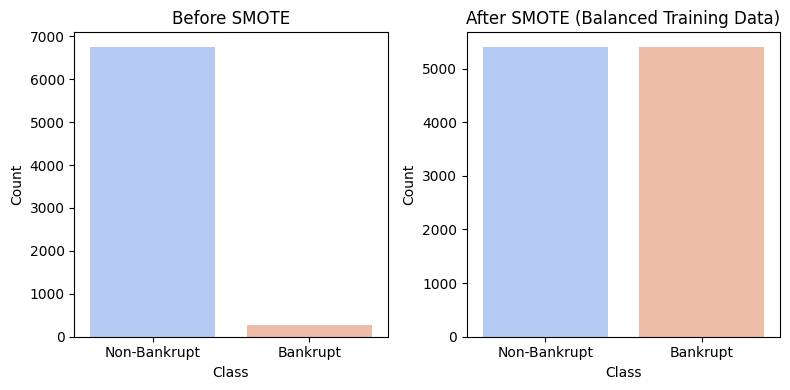

In [ ]:
# Handling Class Imbalance (SMOTE)

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Select the cleaned dataset
df_bal = datasets['1-Year'].copy()

# Decode bytes if necessary
if isinstance(df_bal['class'].iloc[0], bytes):
    df_bal['class'] = df_bal['class'].str.decode('utf-8')

# Convert target column to integer (0 or 1)
df_bal['class'] = df_bal['class'].astype(float).astype(int)

# Separate features and target
X = df_bal.drop('class', axis=1)
y = df_bal['class']

# Check initial class balance
print("Class distribution before SMOTE:", Counter(y))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE to training data only
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Check class balance after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_res))

# --- Visualization ---
plt.figure(figsize=(8,4))

# Before SMOTE
plt.subplot(1,2,1)
sns.barplot(x=['Non-Bankrupt', 'Bankrupt'],
            y=list(Counter(y).values()),
            hue=['Non-Bankrupt', 'Bankrupt'],
            palette="coolwarm", legend=False)
plt.title("Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")

# After SMOTE
plt.subplot(1,2,2)
sns.barplot(x=['Non-Bankrupt', 'Bankrupt'],
            y=list(Counter(y_train_res).values()),
            hue=['Non-Bankrupt', 'Bankrupt'],
            palette="coolwarm", legend=False)
plt.title("After SMOTE (Balanced Training Data)")
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


# Outlier Detection & Treatment

Summary BEFORE outlier treatment:
            mean           std         min         max
Attr1   0.029029      3.633901    -256.890      94.280
Attr2   0.574511      0.813860     -72.162      21.261
Attr3   0.116860      0.412586     -21.234       1.000
Attr4   2.554616     12.887875       0.000    1017.800
Attr5  83.564696  14298.873955 -634140.000  990900.000

Summary AFTER outlier treatment:
            mean        std         min         max
Attr1   0.067263   0.114040   -0.176375    0.310416
Attr2   0.565997   0.280694   -0.231814    1.335622
Attr3   0.131767   0.278024   -0.568255    0.855389
Attr4   1.695390   1.077739    0.000000    4.059161
Attr5 -17.101225  77.987969 -179.071048  148.182229


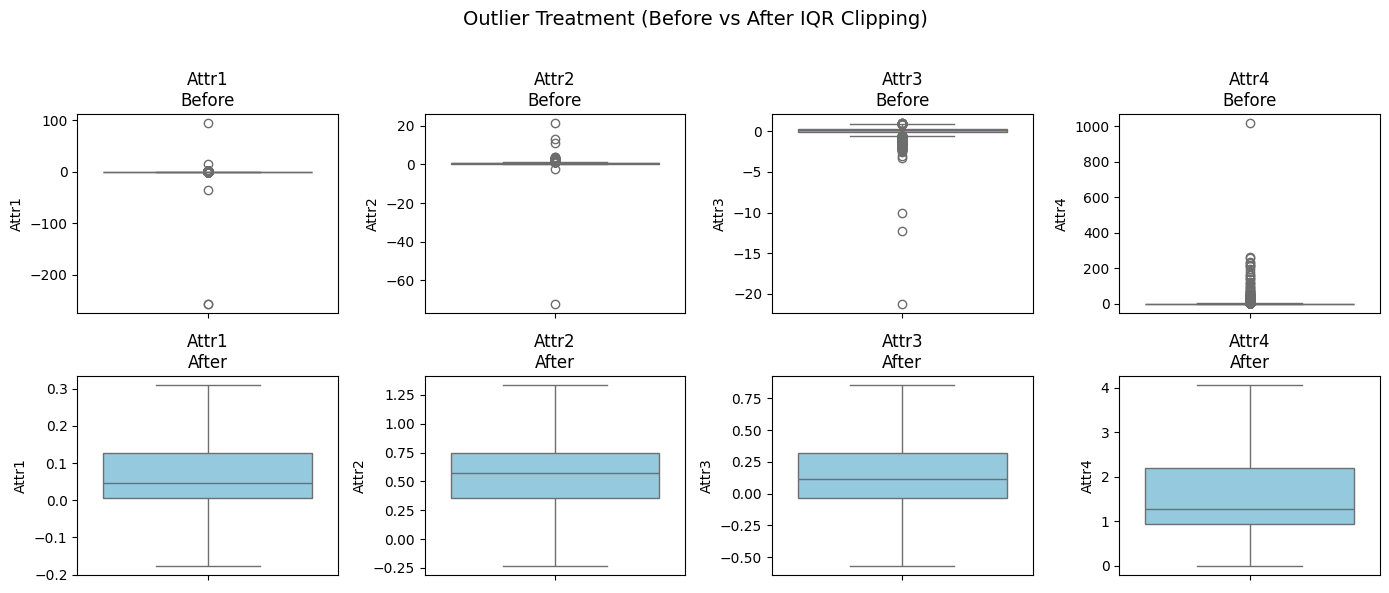

In [ ]:
#  Outlier Detection & Treatment (IQR Method + Visualization)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Working on SMOTE-balanced training data
X_train_out = X_train_res.copy()

#  Summary before clipping
print("Summary BEFORE outlier treatment:")
print(X_train_out.describe().T[['mean', 'std', 'min', 'max']].head(5))

#  IQR-based clipping
for col in X_train_out.columns:
    Q1 = X_train_out[col].quantile(0.25)
    Q3 = X_train_out[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    X_train_out[col] = np.clip(X_train_out[col], lower_bound, upper_bound)

# Summary after clipping
print("\nSummary AFTER outlier treatment:")
print(X_train_out.describe().T[['mean', 'std', 'min', 'max']].head(5))

#  Quick visualization for a few numerical columns
numeric_cols = X_train_out.select_dtypes(include=[np.number]).columns[:4]

plt.figure(figsize=(14, 6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=X_train_res[col], color='salmon')
    plt.title(f"{col}\nBefore")

    plt.subplot(2, 4, i+4)
    sns.boxplot(y=X_train_out[col], color='skyblue')
    plt.title(f"{col}\nAfter")

plt.suptitle("Outlier Treatment (Before vs After IQR Clipping)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



I observed that several financial attributes (like Attr1, Attr4, and Attr5) had extreme outlier values before treatment for example, Attr5 ranged from 634,140 to 990,900, indicating possible data entry or scale distortions.

To make the dataset more stable and suitable for modeling, I applied IQR-based clipping, which limits values outside 1.5x the interquartile range.

After clipping:

The standard deviation of most attributes decreased sharply (e.g, Attr5 from 14,298 → 78),

The range of values became more realistic and consistent,

The overall data distribution became tighter and less skewed, improving model robustness.

This ensures that extreme values don't dominate the learning process and helps models like Logistic Regression, SVM, or KNN perform better.

# Feature Scaling


Summary BEFORE Scaling (Training Data):
      Attr1  Attr2  Attr3  Attr4    Attr5  Attr6  Attr7  Attr8  Attr9  Attr10  \
mean  0.067  0.566  0.132  1.695  -17.101  0.020  0.083  1.297  1.717   0.409   
std   0.114  0.281  0.278  1.078   77.988  0.075  0.133  1.360  0.930   0.283   
min  -0.176 -0.232 -0.568  0.000 -179.071 -0.097 -0.208 -1.993  0.000  -0.343   
max   0.310  1.336  0.855  4.059  148.182  0.151  0.370  4.207  3.915   1.195   

      ...    Attr55  Attr56  Attr57  Attr58  Attr59  Attr60  Attr61   Attr62  \
mean  ...  1737.328   0.067   0.176   0.933   0.191  15.490   8.758   92.968   
std   ...  4225.848   0.097   0.275   0.093   0.305  12.231   4.935   57.851   
min   ... -6119.306  -0.146  -0.421   0.732  -0.484   0.014   0.000    0.000   
max   ...  9641.504   0.278   0.766   1.139   0.807  41.570  20.252  229.636   

      Attr63  Attr64  
mean   5.829   8.238  
std    3.651   7.523  
min    0.000   0.000  
max   14.117  23.727  

[4 rows x 64 columns]

Summary AFTER

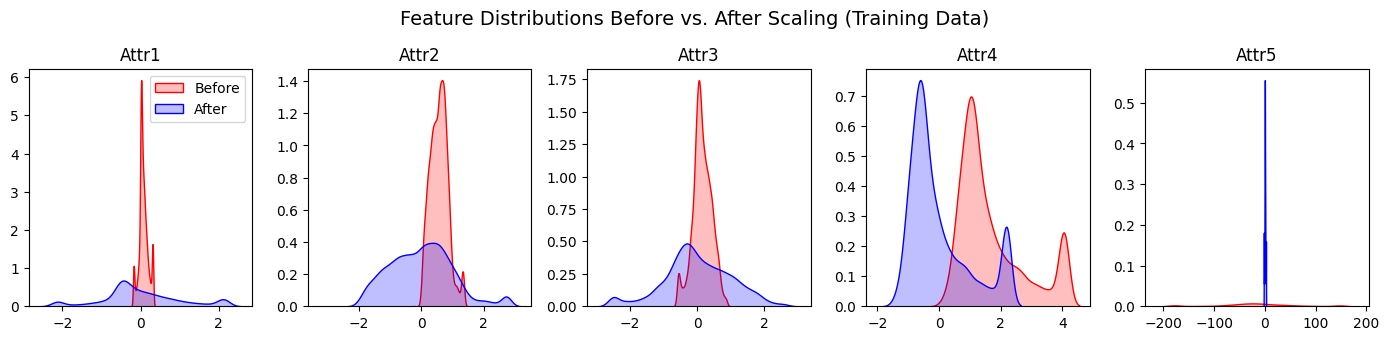

In [ ]:
#  Feature Scaling (StandardScaler)

from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using the outlier-treated training features
X_train_scaled = X_train_out.copy()

# Separate features (X) and target (y) - target is not scaled
y_train_scaled = y_train_res.copy()

#  Before Scaling Summary (Training data)
print("\nSummary BEFORE Scaling (Training Data):")
print(X_train_scaled.describe().loc[['mean', 'std', 'min', 'max']].round(3))

#  Applying StandardScaler to training features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train_scaled),
    columns=X_train_scaled.columns,
    index=X_train_scaled.index
)

# Scaling the test features using the scaler fitted on training data
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)


# After Scaling Summary (Training data)
print("\nSummary AFTER Scaling (Training Data):")
print(X_train_scaled.describe().loc[['mean', 'std', 'min', 'max']].round(3))

#  Visualization: Before vs After Scaling (Training data)
plt.figure(figsize=(14, 6))

# Selecting a few representative attributes for visual clarity
features_to_plot = X_train_out.columns[:5]

for i, col in enumerate(features_to_plot, 1):
    plt.subplot(2, 5, i)
    sns.kdeplot(X_train_out[col], label='Before', color='red', fill=True)
    sns.kdeplot(X_train_scaled[col], label='After', color='blue', fill=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
    if i == 1:
        plt.legend()

plt.suptitle("Feature Distributions Before vs. After Scaling (Training Data)", fontsize=14)
plt.tight_layout()
plt.show()